### Combine 3 indicator data and plot for HSFP data
- 3 session of astrocyte-iAChSnFR behavior + HSFP data
- Combine rewarded and unrewarded trials from all sessions

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import h5py
import json

In [6]:
reward_405_F2 = []
reward_445_F2 = []
reward_473_F2 = []
reward_514_F2 = []
reward_560_F2 = []
unreward_405_F2 = []
unreward_445_F2 = []
unreward_473_F2 = []
unreward_514_F2 = []
unreward_560_F2 = []

# Load each of the seesions
f = h5py.File('C:\AIND\output_data\BigTiffs2023-08-10T11_50_10.0447360-07_00\data_behaviorHSFP.hdf5','r')
time = np.array(f['Time'])
wavelength = np.array(f['wavelength'])
rw_405_F2 = np.array(f['rw_405_F2'])
rw_445_F2 = np.array(f['rw_445_F2'])
rw_473_F2 = np.array(f['rw_473_F2'])
rw_514_F2 = np.array(f['rw_514_F2'])
rw_560_F2 = np.array(f['rw_560_F2'])
unrw_405_F2 = np.array(f['unrw_405_F2'])
unrw_445_F2 = np.array(f['unrw_445_F2'])
unrw_473_F2 = np.array(f['unrw_473_F2'])
unrw_514_F2 = np.array(f['unrw_514_F2'])
unrw_560_F2 = np.array(f['unrw_560_F2'])
f.close()
reward_405_F2.append(rw_405_F2)
reward_445_F2.append(rw_445_F2)
reward_473_F2.append(rw_473_F2)
reward_514_F2.append(rw_514_F2)
reward_560_F2.append(rw_560_F2)
unreward_405_F2.append(unrw_405_F2)
unreward_445_F2.append(unrw_445_F2)
unreward_473_F2.append(unrw_473_F2)
unreward_514_F2.append(unrw_514_F2)
unreward_560_F2.append(unrw_560_F2)

# Concatenate the rewarded and unrewarded trials from each session
Re_405_F2 = np.concatenate(reward_405_F2)
Re_445_F2 = np.concatenate(reward_445_F2)
Re_473_F2 = np.concatenate(reward_473_F2)
Re_514_F2 = np.concatenate(reward_514_F2)
Re_560_F2 = np.concatenate(reward_560_F2)
UnRe_405_F2 = np.concatenate(unreward_405_F2)
UnRe_445_F2 = np.concatenate(unreward_445_F2)
UnRe_473_F2 = np.concatenate(unreward_473_F2)
UnRe_514_F2 = np.concatenate(unreward_514_F2)
UnRe_560_F2 = np.concatenate(unreward_560_F2)

# Get n trials from rewarded and unrewarded trials

# create a random number generator to get n numbers without replacement
trials = 250
rng = np.random.default_rng()
Re_random = rng.choice(Re_473_F2.shape[0], trials, replace=False)
UnRe_random = rng.choice(UnRe_473_F2.shape[0], trials, replace=False)

# Take the 500 trials from wavelength range
wavelength_start_473 = np.where(wavelength == 500)[0][0]
wavelength_end_473 = np.where(wavelength == 510)[0][0]
nRe_473_F2_500 = np.sum(Re_473_F2[Re_random,:,wavelength_start_473:wavelength_end_473],axis=2)/(wavelength_end_473-wavelength_start_473)
nUnRe_473_F2_500 = np.sum(UnRe_473_F2[UnRe_random,:,wavelength_start_473:wavelength_end_473],axis=2)/(wavelength_end_473-wavelength_start_473)

wavelength_start_514 = np.where(wavelength == 535)[0][0]
wavelength_end_514 = np.where(wavelength == 545)[0][0]
nRe_514_F2_500 = np.sum(Re_514_F2[Re_random,:,wavelength_start_514:wavelength_end_514],axis=2)/(wavelength_end_514-wavelength_start_514)
nUnRe_514_F2_500 = np.sum(UnRe_514_F2[UnRe_random,:,wavelength_start_514:wavelength_end_514],axis=2)/(wavelength_end_514-wavelength_start_514)

wavelength_start_560 = np.where(wavelength == 600)[0][0]
wavelength_end_560 = np.where(wavelength == 610)[0][0]
nRe_560_F2_500 = np.sum(Re_560_F2[Re_random,:,wavelength_start_560:wavelength_end_560],axis=2)/(wavelength_end_560-wavelength_start_560)
nUnRe_560_F2_500 = np.sum(UnRe_560_F2[UnRe_random,:,wavelength_start_560:wavelength_end_560],axis=2)/(wavelength_end_560-wavelength_start_560)

# Create a mean and sem plot for the 500 rewarded and unrewarded trials

Re_473_F2_500_mean = np.mean(nRe_473_F2_500,axis=0)
Re_473_F2_500_sem = np.std(nRe_473_F2_500,axis=0)/np.sqrt(nRe_473_F2_500.shape[0])
Re_514_F2_500_mean = np.mean(nRe_514_F2_500,axis=0)
Re_514_F2_500_sem = np.std(nRe_514_F2_500,axis=0)/np.sqrt(nRe_514_F2_500.shape[0])
Re_560_F2_500_mean = np.mean(nRe_560_F2_500,axis=0)
Re_560_F2_500_sem = np.std(nRe_560_F2_500,axis=0)/np.sqrt(nRe_560_F2_500.shape[0])

UnRe_473_F2_500_mean = np.mean(nUnRe_473_F2_500,axis=0)
UnRe_473_F2_500_sem = np.std(nUnRe_473_F2_500,axis=0)/np.sqrt(nUnRe_473_F2_500.shape[0])
UnRe_514_F2_500_mean = np.mean(nUnRe_514_F2_500,axis=0)
UnRe_514_F2_500_sem = np.std(nUnRe_514_F2_500,axis=0)/np.sqrt(nUnRe_514_F2_500.shape[0])
UnRe_560_F2_500_mean = np.mean(nUnRe_560_F2_500,axis=0)
UnRe_560_F2_500_sem = np.std(nUnRe_560_F2_500,axis=0)/np.sqrt(nUnRe_560_F2_500.shape[0])


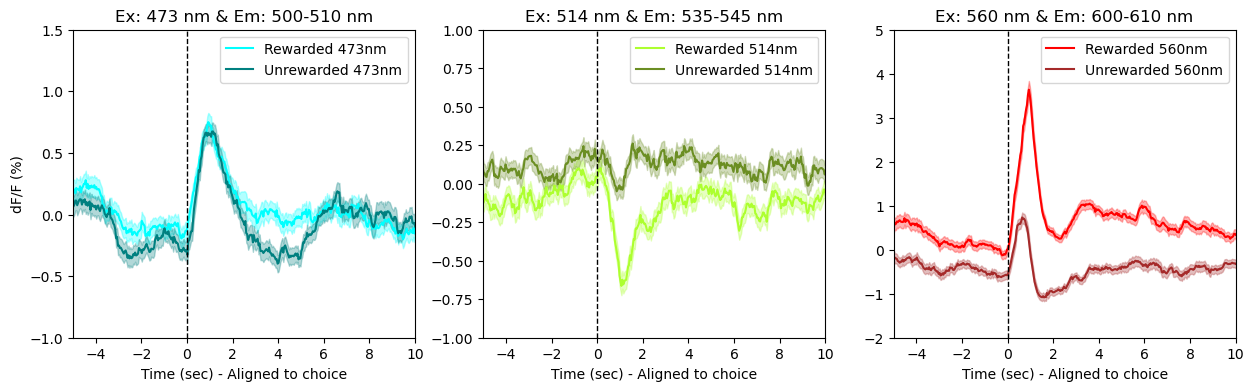

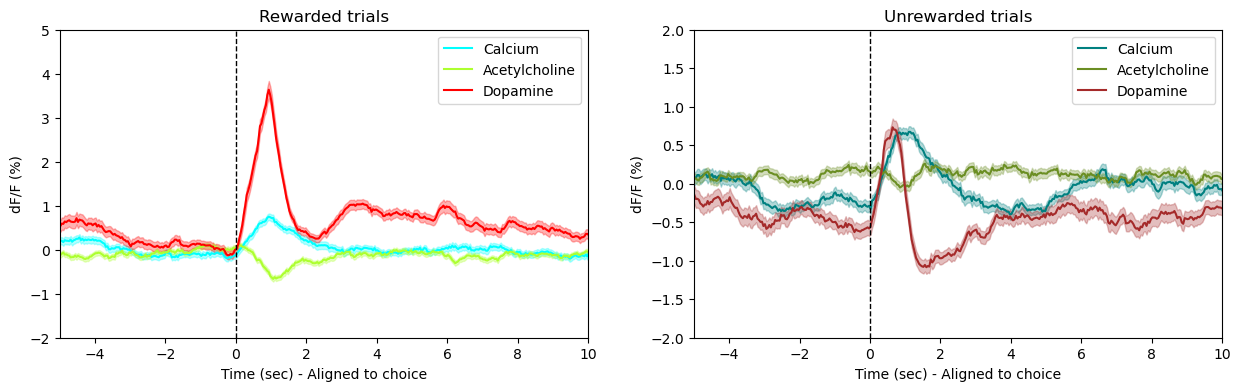

In [7]:
# Plotting

T = time+2.1
A = 0.3
plt.figure(figsize=(15,4))

# Plot the mean and sem for 473 F2
plt.subplot(1,3,1)
plt.plot(T,Re_473_F2_500_mean,color='cyan',label='Rewarded 473nm')
plt.fill_between(T,Re_473_F2_500_mean-Re_473_F2_500_sem,Re_473_F2_500_mean+Re_473_F2_500_sem,color='cyan',alpha=A)
plt.plot(T,UnRe_473_F2_500_mean,color='teal',label='Unrewarded 473nm')
plt.fill_between(T,UnRe_473_F2_500_mean-UnRe_473_F2_500_sem,UnRe_473_F2_500_mean+UnRe_473_F2_500_sem,color='teal',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-1,1.5)
plt.ylabel('dF/F (%)')
plt.title(f'Ex: 473 nm & Em: {wavelength[wavelength_start_473]}-{wavelength[wavelength_end_473]} nm')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

# Plot the mean and sem for 514 F2
plt.subplot(1,3,2)
plt.plot(T,Re_514_F2_500_mean,color='greenyellow',label='Rewarded 514nm')
plt.fill_between(T,Re_514_F2_500_mean-Re_514_F2_500_sem,Re_514_F2_500_mean+Re_514_F2_500_sem,color='greenyellow',alpha=A)
plt.plot(T,UnRe_514_F2_500_mean,color='olivedrab',label='Unrewarded 514nm')
plt.fill_between(T,UnRe_514_F2_500_mean-UnRe_514_F2_500_sem,UnRe_514_F2_500_mean+UnRe_514_F2_500_sem,color='olivedrab',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-1,1)
plt.title(f'Ex: 514 nm & Em: {wavelength[wavelength_start_514]}-{wavelength[wavelength_end_514]} nm')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

# Plot the mean and sem for 560 F2
plt.subplot(1,3,3)
plt.plot(T,Re_560_F2_500_mean,color='red',label='Rewarded 560nm')
plt.fill_between(T,Re_560_F2_500_mean-Re_560_F2_500_sem,Re_560_F2_500_mean+Re_560_F2_500_sem,color='red',alpha=A)
plt.plot(T,UnRe_560_F2_500_mean,color='brown',label='Unrewarded 560nm')
plt.fill_between(T,UnRe_560_F2_500_mean-UnRe_560_F2_500_sem,UnRe_560_F2_500_mean+UnRe_560_F2_500_sem,color='brown',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-2,5)
plt.title(f'Ex: 560 nm & Em: {wavelength[wavelength_start_560]}-{wavelength[wavelength_end_560]} nm')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)
plt.show()

plt.figure(figsize=(15,4))
# Plot the mean and sem for rewarded trials
plt.subplot(1,2,1)
plt.plot(T,Re_473_F2_500_mean,color='cyan',label='Calcium')
plt.fill_between(T,Re_473_F2_500_mean-Re_473_F2_500_sem,Re_473_F2_500_mean+Re_473_F2_500_sem,color='cyan',alpha=A)
plt.plot(T,Re_514_F2_500_mean,color='greenyellow',label='Acetylcholine')
plt.fill_between(T,Re_514_F2_500_mean-Re_514_F2_500_sem,Re_514_F2_500_mean+Re_514_F2_500_sem,color='greenyellow',alpha=A)
plt.plot(T,Re_560_F2_500_mean,color='red',label='Dopamine')
plt.fill_between(T,Re_560_F2_500_mean-Re_560_F2_500_sem,Re_560_F2_500_mean+Re_560_F2_500_sem,color='red',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-2,5)
plt.ylabel('dF/F (%)')
plt.title(f'Rewarded trials')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

# Plot the mean and sem for unrewarded trials
plt.subplot(1,2,2)
plt.plot(T,UnRe_473_F2_500_mean,color='teal',label='Calcium')
plt.fill_between(T,UnRe_473_F2_500_mean-UnRe_473_F2_500_sem,UnRe_473_F2_500_mean+UnRe_473_F2_500_sem,color='teal',alpha=A)
plt.plot(T,UnRe_514_F2_500_mean,color='olivedrab',label='Acetylcholine')
plt.fill_between(T,UnRe_514_F2_500_mean-UnRe_514_F2_500_sem,UnRe_514_F2_500_mean+UnRe_514_F2_500_sem,color='olivedrab',alpha=A)
plt.plot(T,UnRe_560_F2_500_mean,color='brown',label='Dopamine')
plt.fill_between(T,UnRe_560_F2_500_mean-UnRe_560_F2_500_sem,UnRe_560_F2_500_mean+UnRe_560_F2_500_sem,color='brown',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-2,2)
plt.ylabel('dF/F (%)')
plt.title(f'Unrewarded trials')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)
plt.show()

In [8]:
# Mouse 2

reward_405_F2 = []
reward_445_F2 = []
reward_473_F2 = []
reward_514_F2 = []
reward_560_F2 = []
unreward_405_F2 = []
unreward_445_F2 = []
unreward_473_F2 = []
unreward_514_F2 = []
unreward_560_F2 = []

# Load each of the seesions
f = h5py.File('D:\BigTiffs2023-08-09T12_15_01.5121536-07_00\data_behaviorHSFP.hdf5','r')
time = np.array(f['Time'])
wavelength = np.array(f['wavelength'])
rw_405_F2 = np.array(f['rw_405_F2'])
rw_445_F2 = np.array(f['rw_445_F2'])
rw_473_F2 = np.array(f['rw_473_F2'])
rw_514_F2 = np.array(f['rw_514_F2'])
rw_560_F2 = np.array(f['rw_560_F2'])
unrw_405_F2 = np.array(f['unrw_405_F2'])
unrw_445_F2 = np.array(f['unrw_445_F2'])
unrw_473_F2 = np.array(f['unrw_473_F2'])
unrw_514_F2 = np.array(f['unrw_514_F2'])
unrw_560_F2 = np.array(f['unrw_560_F2'])
f.close()
reward_405_F2.append(rw_405_F2)
reward_445_F2.append(rw_445_F2)
reward_473_F2.append(rw_473_F2)
reward_514_F2.append(rw_514_F2)
reward_560_F2.append(rw_560_F2)
unreward_405_F2.append(unrw_405_F2)
unreward_445_F2.append(unrw_445_F2)
unreward_473_F2.append(unrw_473_F2)
unreward_514_F2.append(unrw_514_F2)
unreward_560_F2.append(unrw_560_F2)

# Concatenate the rewarded and unrewarded trials from each session
Re_405_F2 = np.concatenate(reward_405_F2)
Re_445_F2 = np.concatenate(reward_445_F2)
Re_473_F2 = np.concatenate(reward_473_F2)
Re_514_F2 = np.concatenate(reward_514_F2)
Re_560_F2 = np.concatenate(reward_560_F2)
UnRe_405_F2 = np.concatenate(unreward_405_F2)
UnRe_445_F2 = np.concatenate(unreward_445_F2)
UnRe_473_F2 = np.concatenate(unreward_473_F2)
UnRe_514_F2 = np.concatenate(unreward_514_F2)
UnRe_560_F2 = np.concatenate(unreward_560_F2)

# Get n trials from rewarded and unrewarded trials

# create a random number generator to get n numbers without replacement
trials = 125
rng = np.random.default_rng()
Re_random = rng.choice(Re_473_F2.shape[0], trials, replace=False)
UnRe_random = rng.choice(UnRe_473_F2.shape[0], trials, replace=False)

# Take the n trials from wavelength range
wavelength_start_473 = np.where(wavelength == 500)[0][0]
wavelength_end_473 = np.where(wavelength == 510)[0][0]
nRe_473_F2_500 = np.sum(Re_473_F2[Re_random,:,wavelength_start_473:wavelength_end_473],axis=2)/(wavelength_end_473-wavelength_start_473)
nUnRe_473_F2_500 = np.sum(UnRe_473_F2[UnRe_random,:,wavelength_start_473:wavelength_end_473],axis=2)/(wavelength_end_473-wavelength_start_473)

wavelength_start_514 = np.where(wavelength == 535)[0][0]
wavelength_end_514 = np.where(wavelength == 545)[0][0]
nRe_514_F2_500 = np.sum(Re_514_F2[Re_random,:,wavelength_start_514:wavelength_end_514],axis=2)/(wavelength_end_514-wavelength_start_514)
nUnRe_514_F2_500 = np.sum(UnRe_514_F2[UnRe_random,:,wavelength_start_514:wavelength_end_514],axis=2)/(wavelength_end_514-wavelength_start_514)

wavelength_start_560 = np.where(wavelength == 600)[0][0]
wavelength_end_560 = np.where(wavelength == 610)[0][0]
nRe_560_F2_500 = np.sum(Re_560_F2[Re_random,:,wavelength_start_560:wavelength_end_560],axis=2)/(wavelength_end_560-wavelength_start_560)
nUnRe_560_F2_500 = np.sum(UnRe_560_F2[UnRe_random,:,wavelength_start_560:wavelength_end_560],axis=2)/(wavelength_end_560-wavelength_start_560)

# Create a mean and sem plot for the n rewarded and unrewarded trials

Re_473_F2_500_mean = np.mean(nRe_473_F2_500,axis=0)
Re_473_F2_500_sem = np.std(nRe_473_F2_500,axis=0)/np.sqrt(nRe_473_F2_500.shape[0])
Re_514_F2_500_mean = np.mean(nRe_514_F2_500,axis=0)
Re_514_F2_500_sem = np.std(nRe_514_F2_500,axis=0)/np.sqrt(nRe_514_F2_500.shape[0])
Re_560_F2_500_mean = np.mean(nRe_560_F2_500,axis=0)
Re_560_F2_500_sem = np.std(nRe_560_F2_500,axis=0)/np.sqrt(nRe_560_F2_500.shape[0])

UnRe_473_F2_500_mean = np.mean(nUnRe_473_F2_500,axis=0)
UnRe_473_F2_500_sem = np.std(nUnRe_473_F2_500,axis=0)/np.sqrt(nUnRe_473_F2_500.shape[0])
UnRe_514_F2_500_mean = np.mean(nUnRe_514_F2_500,axis=0)
UnRe_514_F2_500_sem = np.std(nUnRe_514_F2_500,axis=0)/np.sqrt(nUnRe_514_F2_500.shape[0])
UnRe_560_F2_500_mean = np.mean(nUnRe_560_F2_500,axis=0)
UnRe_560_F2_500_sem = np.std(nUnRe_560_F2_500,axis=0)/np.sqrt(nUnRe_560_F2_500.shape[0])



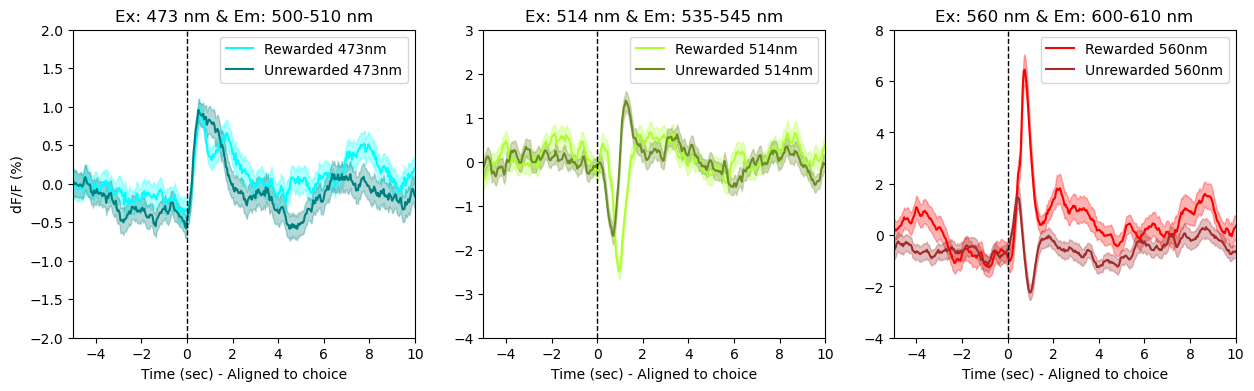

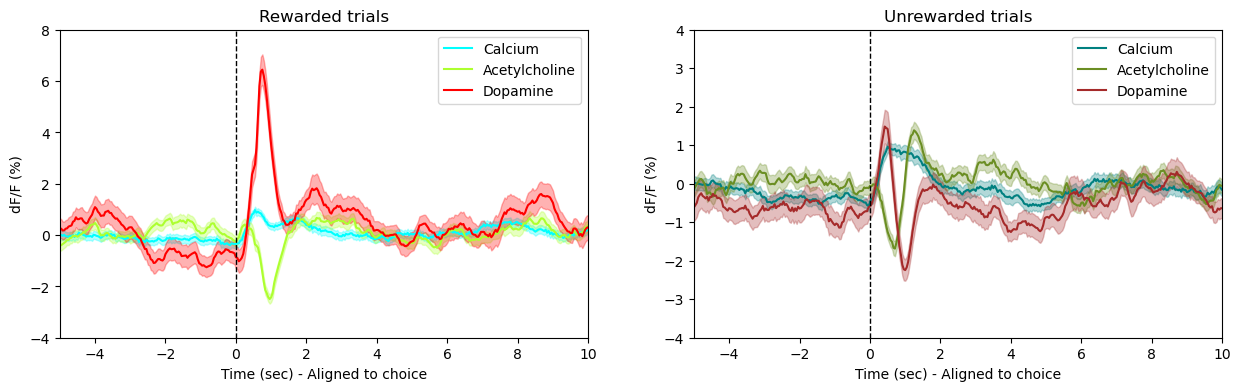

In [9]:
T = time+2
A = 0.3
plt.figure(figsize=(15,4))

# Plot the mean and sem for 473 F2
plt.subplot(1,3,1)
plt.plot(T,Re_473_F2_500_mean,color='cyan',label='Rewarded 473nm')
plt.fill_between(T,Re_473_F2_500_mean-Re_473_F2_500_sem,Re_473_F2_500_mean+Re_473_F2_500_sem,color='cyan',alpha=A)
plt.plot(T,UnRe_473_F2_500_mean,color='teal',label='Unrewarded 473nm')
plt.fill_between(T,UnRe_473_F2_500_mean-UnRe_473_F2_500_sem,UnRe_473_F2_500_mean+UnRe_473_F2_500_sem,color='teal',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-2,2)
plt.ylabel('dF/F (%)')
plt.title(f'Ex: 473 nm & Em: {wavelength[wavelength_start_473]}-{wavelength[wavelength_end_473]} nm')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

# Plot the mean and sem for 514 F2
plt.subplot(1,3,2)
plt.plot(T,Re_514_F2_500_mean,color='greenyellow',label='Rewarded 514nm')
plt.fill_between(T,Re_514_F2_500_mean-Re_514_F2_500_sem,Re_514_F2_500_mean+Re_514_F2_500_sem,color='greenyellow',alpha=A)
plt.plot(T,UnRe_514_F2_500_mean,color='olivedrab',label='Unrewarded 514nm')
plt.fill_between(T,UnRe_514_F2_500_mean-UnRe_514_F2_500_sem,UnRe_514_F2_500_mean+UnRe_514_F2_500_sem,color='olivedrab',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-4,3)
plt.title(f'Ex: 514 nm & Em: {wavelength[wavelength_start_514]}-{wavelength[wavelength_end_514]} nm')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

# Plot the mean and sem for 560 F2
plt.subplot(1,3,3)
plt.plot(T,Re_560_F2_500_mean,color='red',label='Rewarded 560nm')
plt.fill_between(T,Re_560_F2_500_mean-Re_560_F2_500_sem,Re_560_F2_500_mean+Re_560_F2_500_sem,color='red',alpha=A)
plt.plot(T,UnRe_560_F2_500_mean,color='brown',label='Unrewarded 560nm')
plt.fill_between(T,UnRe_560_F2_500_mean-UnRe_560_F2_500_sem,UnRe_560_F2_500_mean+UnRe_560_F2_500_sem,color='brown',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-4,8)
plt.title(f'Ex: 560 nm & Em: {wavelength[wavelength_start_560]}-{wavelength[wavelength_end_560]} nm')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)
plt.show()

plt.figure(figsize=(15,4))
# Plot the mean and sem for rewarded trials
plt.subplot(1,2,1)
plt.plot(T,Re_473_F2_500_mean,color='cyan',label='Calcium')
plt.fill_between(T,Re_473_F2_500_mean-Re_473_F2_500_sem,Re_473_F2_500_mean+Re_473_F2_500_sem,color='cyan',alpha=A)
plt.plot(T,Re_514_F2_500_mean,color='greenyellow',label='Acetylcholine')
plt.fill_between(T,Re_514_F2_500_mean-Re_514_F2_500_sem,Re_514_F2_500_mean+Re_514_F2_500_sem,color='greenyellow',alpha=A)
plt.plot(T,Re_560_F2_500_mean,color='red',label='Dopamine')
plt.fill_between(T,Re_560_F2_500_mean-Re_560_F2_500_sem,Re_560_F2_500_mean+Re_560_F2_500_sem,color='red',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-4,8)
plt.ylabel('dF/F (%)')
plt.title(f'Rewarded trials')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

# Plot the mean and sem for unrewarded trials
plt.subplot(1,2,2)
plt.plot(T,UnRe_473_F2_500_mean,color='teal',label='Calcium')
plt.fill_between(T,UnRe_473_F2_500_mean-UnRe_473_F2_500_sem,UnRe_473_F2_500_mean+UnRe_473_F2_500_sem,color='teal',alpha=A)
plt.plot(T,UnRe_514_F2_500_mean,color='olivedrab',label='Acetylcholine')
plt.fill_between(T,UnRe_514_F2_500_mean-UnRe_514_F2_500_sem,UnRe_514_F2_500_mean+UnRe_514_F2_500_sem,color='olivedrab',alpha=A)
plt.plot(T,UnRe_560_F2_500_mean,color='brown',label='Dopamine')
plt.fill_between(T,UnRe_560_F2_500_mean-UnRe_560_F2_500_sem,UnRe_560_F2_500_mean+UnRe_560_F2_500_sem,color='brown',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-4,4)
plt.ylabel('dF/F (%)')
plt.title(f'Unrewarded trials')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)
plt.show()

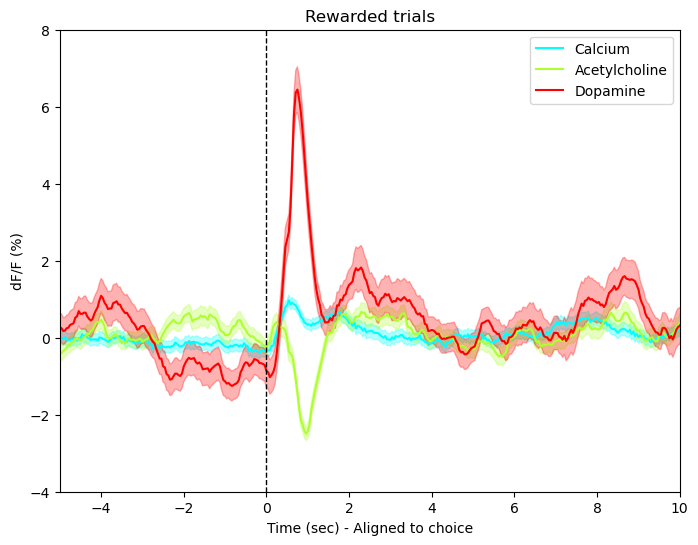

In [14]:
plt.figure(figsize=(8,6))
# Plot the mean and sem for rewarded trials
plt.plot(T,Re_473_F2_500_mean,color='cyan',label='Calcium')
plt.fill_between(T,Re_473_F2_500_mean-Re_473_F2_500_sem,Re_473_F2_500_mean+Re_473_F2_500_sem,color='cyan',alpha=A)
plt.plot(T,Re_514_F2_500_mean,color='greenyellow',label='Acetylcholine')
plt.fill_between(T,Re_514_F2_500_mean-Re_514_F2_500_sem,Re_514_F2_500_mean+Re_514_F2_500_sem,color='greenyellow',alpha=A)
plt.plot(T,Re_560_F2_500_mean,color='red',label='Dopamine')
plt.fill_between(T,Re_560_F2_500_mean-Re_560_F2_500_sem,Re_560_F2_500_mean+Re_560_F2_500_sem,color='red',alpha=A)
plt.xlim(-5,10)
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylim(-4,8)
plt.ylabel('dF/F (%)')
plt.title(f'Rewarded trials')
plt.legend()
plt.axvline(x=0,color='black',linestyle='--',linewidth=1)

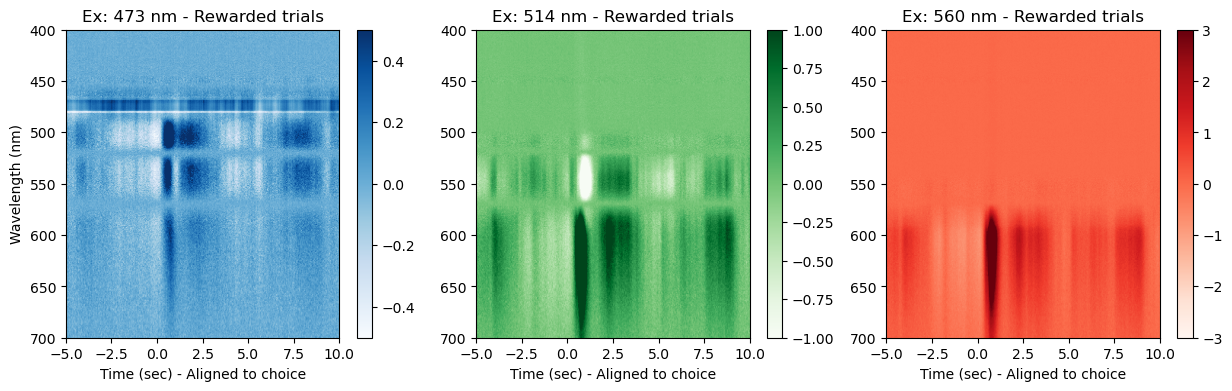

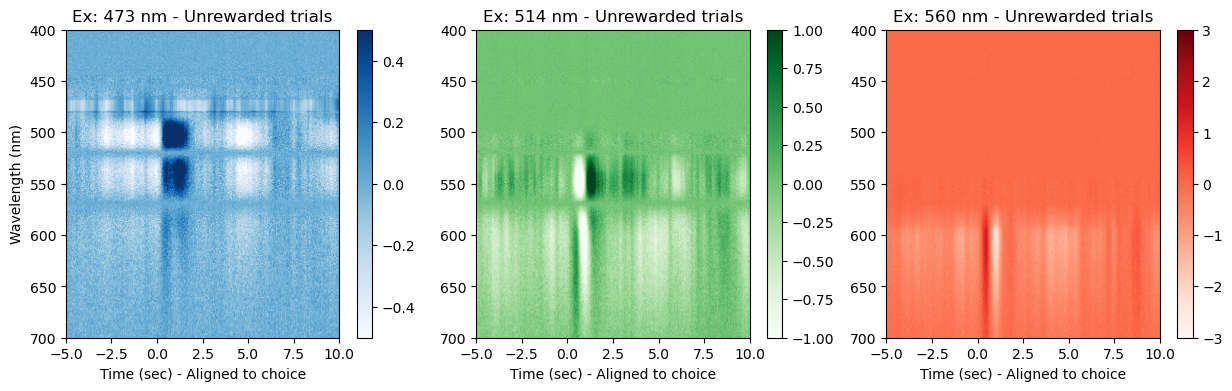

In [10]:
# Create spectrogram plots at 473, 514, 560 nm excitation lasers

# 473 nm
Re_473_F2_mean = np.mean(Re_473_F2,axis=0)
UnRe_473_F2_mean = np.mean(UnRe_473_F2,axis=0)
# 514 nm
Re_514_F2_mean = np.mean(Re_514_F2,axis=0)
UnRe_514_F2_mean = np.mean(UnRe_514_F2,axis=0)
# 560 nm
Re_560_F2_mean = np.mean(Re_560_F2,axis=0)
UnRe_560_F2_mean = np.mean(UnRe_560_F2,axis=0)

# Plot rewarded trials
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(np.transpose(Re_473_F2_mean),aspect='auto',cmap='Blues',vmin=-0.5,vmax=0.5,extent=[-8,12,700,400])
plt.colorbar()
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylabel('Wavelength (nm)')
plt.title('Ex: 473 nm - Rewarded trials')
plt.xlim(-5,10)
plt.subplot(1,3,2)
plt.imshow(np.transpose(Re_514_F2_mean),aspect='auto',cmap='Greens',vmin=-1,vmax=1,extent=[-8,12,700,400])
plt.colorbar()
plt.xlabel('Time (sec) - Aligned to choice')
plt.title('Ex: 514 nm - Rewarded trials')
plt.xlim(-5,10)
plt.subplot(1,3,3)
plt.imshow(np.transpose(Re_560_F2_mean),aspect='auto',cmap='Reds',vmin=-3,vmax=3,extent=[-8,12,700,400])
plt.colorbar()
plt.xlabel('Time (sec) - Aligned to choice')
plt.title('Ex: 560 nm - Rewarded trials')
plt.xlim(-5,10)
plt.show()

# Plot unrewarded trials
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(np.transpose(UnRe_473_F2_mean),aspect='auto',cmap='Blues',vmin=-0.5,vmax=0.5,extent=[-8,12,700,400])
plt.colorbar()
plt.xlabel('Time (sec) - Aligned to choice')
plt.ylabel('Wavelength (nm)')
plt.title('Ex: 473 nm - Unrewarded trials')
plt.xlim(-5,10)
plt.subplot(1,3,2)
plt.imshow(np.transpose(UnRe_514_F2_mean),aspect='auto',cmap='Greens',vmin=-1,vmax=1,extent=[-8,12,700,400])
plt.colorbar()
plt.xlabel('Time (sec) - Aligned to choice')
plt.title('Ex: 514 nm - Unrewarded trials')
plt.xlim(-5,10)
plt.subplot(1,3,3)
plt.imshow(np.transpose(UnRe_560_F2_mean),aspect='auto',cmap='Reds',vmin=-3,vmax=3,extent=[-8,12,700,400])
plt.colorbar()
plt.xlabel('Time (sec) - Aligned to choice')
plt.title('Ex: 560 nm - Unrewarded trials')
plt.xlim(-5,10)
plt.show()

